In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from sklearn.utils import shuffle
from skimage import color
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, BatchNormalization, MaxPool2D


Using TensorFlow backend.


In [3]:
shapes = ['triangles', 'circles', 'squares']

path= 'C:/Users/hp/shapes/'

files= []
result= []

for shape in shapes:
    new_path= path+shape
    
    for file in os.listdir(new_path):
        files.append(os.path.join(new_path,file))
        result.append(shape)
        

In [4]:
len(files)

300

In [37]:
len(result)

300

In [38]:
files[:5]

['C:/Users/hp/shapes/triangles\\drawing(1).png',
 'C:/Users/hp/shapes/triangles\\drawing(10).png',
 'C:/Users/hp/shapes/triangles\\drawing(100).png',
 'C:/Users/hp/shapes/triangles\\drawing(11).png',
 'C:/Users/hp/shapes/triangles\\drawing(12).png']

In [40]:
images = []
for file in files:
    img= plt.imread(file)
    img= color.rgb2gray(img)
    img= img.ravel()
    images.append(img)

In [41]:
len(images)

300

In [43]:
df = pd.DataFrame(images)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [44]:
df['result'] = result
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,result
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,triangles
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,triangles
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,triangles
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,triangles
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,triangles


In [45]:
df = shuffle(df) 
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,result
72,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,triangles
109,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,circles
204,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,squares
86,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,triangles
277,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,squares


In [46]:
df['result'] = df['result'].replace({'circles':0, 'triangles':1, 'squares':2})
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,result
72,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
109,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
204,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2
86,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
277,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2


In [47]:
y = df['result']
X = df.drop('result', axis=1)

In [48]:
X = X.values.reshape(-1,28,28,1)

In [49]:
y = to_categorical(y)
y.astype('int32')


array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1,

In [59]:
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=42)

#print(f"No. of training examples: {X.shape[0]}")
#print(f"No. of testing examples: {y.shape[0]}")

In [60]:
X.shape

(300, 28, 28, 1)

In [58]:
y.shape

(300, 3)

In [61]:
model= Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
__________

In [63]:
from keras.callbacks import ModelCheckpoint

model_save= ModelCheckpoint('best.hdf5', save_best_only=True, monitor='val_accuracy')

In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
history= model.fit(X_train, y_train, batch_size=20, epochs=100, verbose=1, validation_data=(X_test, y_test), callbacks=[model_save])

Instructions for updating:
Use tf.cast instead.
Train on 240 samples, validate on 60 samples
Epoch 1/100
240/240 [==============================] - 2s 10ms/step - loss: 1.0982 - acc: 0.3583 - val_loss: 1.1030 - val_acc: 0.3333
Epoch 2/100
240/240 [==============================] - 1s 5ms/step - loss: 1.1061 - acc: 0.3708 - val_loss: 1.0964 - val_acc: 0.3667
Epoch 3/100
240/240 [==============================] - 1s 4ms/step - loss: 1.0995 - acc: 0.3375 - val_loss: 1.0986 - val_acc: 0.3000
Epoch 4/100
240/240 [==============================] - 1s 4ms/step - loss: 1.0923 - acc: 0.3417 - val_loss: 1.0967 - val_acc: 0.3000
Epoch 5/100
240/240 [==============================] - 1s 4ms/step - loss: 1.0821 - acc: 0.4500 - val_loss: 1.0876 - val_acc: 0.4333
Epoch 6/100
240/240 [==============================] - 1s 4ms/step - loss: 1.0600 - acc: 0.4917 - val_loss: 1.0674 - val_acc: 0.4833
Epoch 7/100
240/240 [==============================] - 1s 4ms/step - loss: 0.9944 - acc: 0.5917 - val_loss: 

Epoch 60/100
240/240 [==============================] - 1s 5ms/step - loss: 0.0123 - acc: 0.9958 - val_loss: 0.3984 - val_acc: 0.9000
Epoch 61/100
240/240 [==============================] - 1s 4ms/step - loss: 0.0087 - acc: 1.0000 - val_loss: 0.4012 - val_acc: 0.8833
Epoch 62/100
240/240 [==============================] - 1s 4ms/step - loss: 0.0079 - acc: 1.0000 - val_loss: 0.3722 - val_acc: 0.9167
Epoch 63/100
240/240 [==============================] - 1s 4ms/step - loss: 0.0072 - acc: 1.0000 - val_loss: 0.4089 - val_acc: 0.9167
Epoch 64/100
240/240 [==============================] - 1s 5ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4123 - val_acc: 0.9000
Epoch 65/100
240/240 [==============================] - 1s 4ms/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.4075 - val_acc: 0.9000
Epoch 66/100
240/240 [==============================] - 1s 4ms/step - loss: 0.0091 - acc: 0.9958 - val_loss: 0.8723 - val_acc: 0.8667
Epoch 67/100
240/240 [==============================] - 1s 4ms

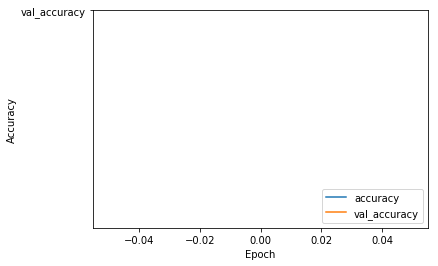

In [66]:
plt.plot(['accuracy'], label='accuracy')
plt.plot(['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [67]:
print(test_acc)

0.9166666706403096


In [68]:
# serialize model to JSON and save the model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("final.h5")

In [69]:
pred= model.predict(X_test)
predictions= np.argmax(pred, axis=1)
predictions

array([0, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0], dtype=int64)

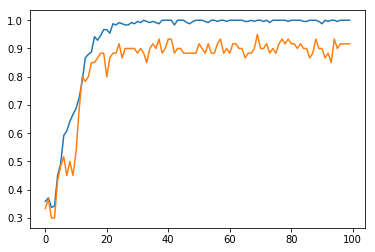

In [76]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

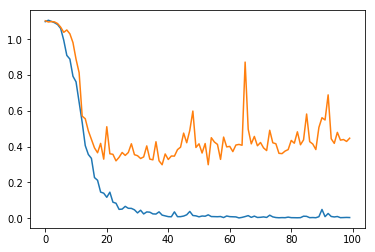

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [84]:
X_train[1] 

array([[[0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994]],

       [[0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        

In [85]:
img_path = X_test[1]  
print(img_path.shape)
if(len(img_path.shape) == 0):
    plt.imshow(np.squeeze(img_path))
elif(len(img_path.shape) == 1):
    plt.imshow(img_path)
elif(len(img_path.shape) == 2):
    plt.imshow(img_path)
else:
    print("Higher dimensional data")

(28, 28, 1)
Higher dimensional data


TypeError: Image data cannot be converted to float

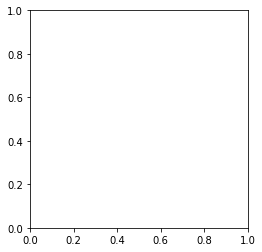

In [86]:
plt.imshow((tf.squeeze(X_train[1])))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


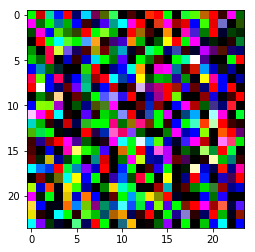

In [125]:
plt.imshow(np.random.randn(24, 24, 3)) # works
#plt.imshow(np.random.randn(24, 24)) # works

In [126]:
y_train[2]

array([0., 1., 0.], dtype=float32)

In [129]:
predictions[1]

2